# Desafio 3

## Importando

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd   
import seaborn as sns
from sklearn.preprocessing import Normalizer
import warnings

warnings.filterwarnings('ignore')

def ColabOuCode(path_drive, path_local, ncolunas=None):
    '''
    Importa o DataFrame de acordo com a plataforma usada. Retorna um DataFrame.
    '''
    try:
        from google.colab import drive
        drive.mount('/content/drive')
        df = pd.read_csv(path_drive)
    except:
        if ncolunas is None: df = pd.read_csv(path_local)
        else: df = pd.read_csv(path_local, nrows=ncolunas)
    return df


In [2]:
drive = '/content/drive/MyDrive/Colab Notebooks/TERA-desafio-3/data/fraud_detection_dataset.csv'
local = './data/fraud_detection_dataset.csv'

df = ColabOuCode(drive,local,ncolunas=None)

In [3]:
df.shape


(6362620, 11)

In [4]:
print(df.info())
print()
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [5]:
pd.set_option('display.max_columns', 11)
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
df.rename(columns={'oldbalanceOrg':'oldbalanceOrig'}, inplace=True)


## Tratamento

In [7]:
varMonet = ['amount', 'oldbalanceOrig', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']


'''
for v in varMonet:
    sns.displot(
        df[v], 
        kde=True,
    )
    plt.show()
'''

'\nfor v in varMonet:\n    sns.displot(\n        df[v], \n        kde=True,\n    )\n    plt.show()\n'

In [8]:
'''
for v in varMonet: df[v][df[v] > 0] = np.log(df[v][df[v] > 0])

df.head()
'''

pass

In [9]:
df.describe(percentiles=(0.9,0.95,0.99))


,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
90%,3.990000e+02,3.654233e+05,1.822508e+06,1.970345e+06,2.914267e+06,3.194870e+06,0.000000e+00,0.000000e+00
95%,4.900000e+02,5.186342e+05,5.823702e+06,5.980262e+06,5.147230e+06,5.515716e+06,0.000000e+00,0.000000e+00
99%,6.810000e+02,1.615979e+06,1.602726e+07,1.617616e+07,1.237182e+07,1.313787e+07,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [10]:
# convertendo nameOrig e nameDest para int.
df['nameOrig'] = df['nameOrig'].str[1:]
df['nameDest'] = df['nameDest'].str[1:]

df[['nameOrig','nameDest']] = df[['nameOrig','nameDest']].astype(int)


In [11]:
horas = np.arange(1,25)

df.loc[df['step'] < 24, 'step'] = df['step'] - 1
df.loc[df['step'] >= 24, 'step'] = df['step'] % 24


df.describe()

,step,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.523171e+01,1.798619e+05,1.073759e+09,8.338831e+05,8.551137e+05,1.073432e+09,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,4.342552e+00,6.038582e+05,6.200783e+08,2.888243e+06,2.924049e+06,6.204927e+08,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,0.000000e+00,0.000000e+00,1.338000e+03,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.200000e+01,1.338957e+04,5.370177e+08,0.000000e+00,0.000000e+00,5.360919e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.600000e+01,7.487194e+04,1.073741e+09,1.420800e+04,0.000000e+00,1.072209e+09,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,1.900000e+01,2.087215e+05,1.610814e+09,1.073152e+05,1.442584e+05,1.611938e+09,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,2.300000e+01,9.244552e+07,2.147484e+09,5.958504e+07,4.958504e+07,2.147483e+09,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [12]:
df.rename({'step':'hora'}, axis=1, inplace=True)

In [13]:
df.head()

,hora,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0,PAYMENT,9839.64,1231006815,170136.0,160296.36,1979787155,0.0,0.0,0,0
1,0,PAYMENT,1864.28,1666544295,21249.0,19384.72,2044282225,0.0,0.0,0,0
2,0,TRANSFER,181.00,1305486145,181.0,0.00,553264065,0.0,0.0,1,0
3,0,CASH_OUT,181.00,840083671,181.0,0.00,38997010,21182.0,0.0,1,0
4,0,PAYMENT,11668.14,2048537720,41554.0,29885.86,1230701703,0.0,0.0,0,0


## AED

<AxesSubplot:xlabel='type', ylabel='count'>

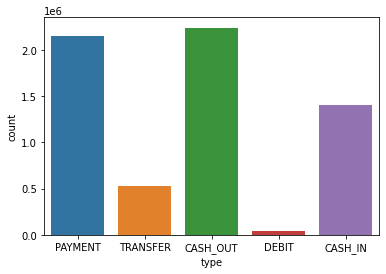

In [14]:
sns.countplot(df['type'])

In [15]:
for t in df.hora.unique():
    print(t)
    print(df['isFraud'][df['hora'] == t].value_counts(normalize=False))
    

0
0    73979
1      316
Name: isFraud, dtype: int64
1
0    25067
1      350
Name: isFraud, dtype: int64
2
0    8188
1     368
Name: isFraud, dtype: int64
3
0    1688
1     332
Name: isFraud, dtype: int64
4
0    1071
1     270
Name: isFraud, dtype: int64
5
0    2254
1     382
Name: isFraud, dtype: int64
6
0    8249
1     348
Name: isFraud, dtype: int64
7
0    22920
1      328
Name: isFraud, dtype: int64
8
0    43071
1      375
Name: isFraud, dtype: int64
9
0    281548
1       333
Name: isFraud, dtype: int64
10
0    426608
1       371
Name: isFraud, dtype: int64
11
0    444573
1       331
Name: isFraud, dtype: int64
12
0    484441
1       339
Name: isFraud, dtype: int64
13
0    472100
1       344
Name: isFraud, dtype: int64
14
0    442416
1       361
Name: isFraud, dtype: int64
15
0    414217
1       331
Name: isFraud, dtype: int64
16
0    442160
1       342
Name: isFraud, dtype: int64
17
0    445797
1       362
Name: isFraud, dtype: int64
18
0    581944
1       338
Name: isFraud, dtype:

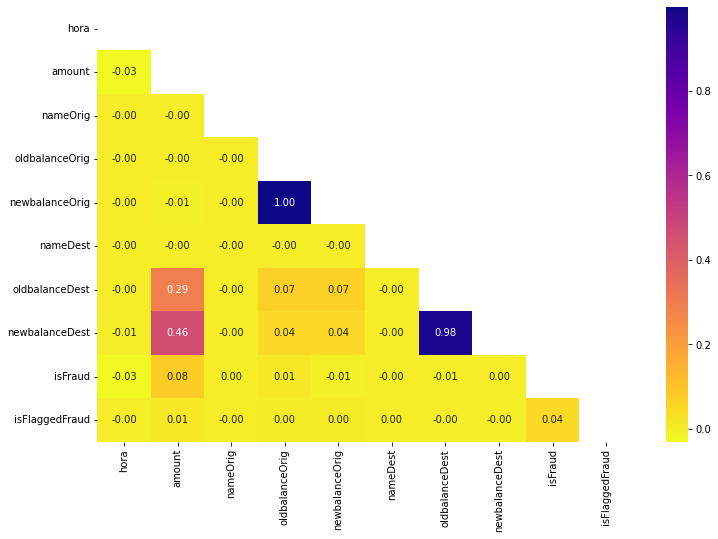

In [16]:
sns.set_context(font_scale=1.9)
plt.figure(figsize=(12,8))

sns.heatmap(
    df.corr(), 
    annot=True,
    fmt='.2f', 
    cmap='plasma_r', 
    mask=np.triu(np.ones_like(df.corr()))
)

plt.show()


Tanto ```nameOrig``` quanto ```nameDest``` tem valores repetidos. Então vou utilizar estas colunas para criar uma feature que indica se o usuário aparece em alguma outra transação e na mesma posição.

Utilizarei apenas as colunas ```oldbalanceOrig```, ```oldbalanceDest``` e ```amount```.


In [17]:
# Criação de feature

df['destReinc'] = 0
df['origReinc'] = 0

df.loc[df['nameDest'].duplicated(), 'destReinc'] = 1
df.loc[df['nameOrig'].duplicated(), 'origReinc'] = 1


In [18]:
# Selecionando colunas para continuar e resentando os índices após os tratamentos das variáveis

colsSelect = [
    'hora',
    'type',
#    'prefixOrig',
#    'nameOrig',
    'oldbalanceOrig',
    'origReinc',
#    'newbalanceOrig',
#    'prefixDest',
#    'nameDest',
    'oldbalanceDest',
    'destReinc',
#    'newbalanceDest',
    'amount',
    'isFraud',
#    'isFlaggedFraud'
]

df = df[colsSelect]
df.reset_index(drop=True, inplace=True)

df


,hora,type,oldbalanceOrig,origReinc,oldbalanceDest,destReinc,amount,isFraud
0,0,PAYMENT,170136.00,0,0.00,0,9839.64,0
1,0,PAYMENT,21249.00,0,0.00,0,1864.28,0
2,0,TRANSFER,181.00,0,0.00,0,181.00,1
3,0,CASH_OUT,181.00,0,21182.00,0,181.00,1
4,0,PAYMENT,41554.00,0,0.00,0,11668.14,0
...,...,...,...,...,...,...,...,...
6362615,23,CASH_OUT,339682.13,0,0.00,1,339682.13,1
6362616,23,TRANSFER,6311409.28,0,0.00,0,6311409.28,1
6362617,23,CASH_OUT,6311409.28,0,68488.84,1,6311409.28,1
6362618,23,TRANSFER,850002.52,0,0.00,0,850002.52,1


In [19]:
# Criando os dummies
df = pd.get_dummies(df,
                    columns=['type'],
                    drop_first=True
)

# Invertendo os valores para facilitar na visualização das matrizes de confusão
df['isFraud'] = df['isFraud'] - 1
df['isFraud'][df['isFraud'] == -1] = 1

# Normalizando os valores monetários
normalizar = Normalizer()

quantidade = normalizar.fit_transform(df.amount.values.reshape(1,-1))
df['amount'] = quantidade.reshape(-1,1)

balanceOrig = normalizar.fit_transform(df.amount.values.reshape(1,-1))
df['oldbalanceOrig'] = balanceOrig.reshape(-1,1)

balanceDest = normalizar.fit_transform(df.amount.values.reshape(1,-1))
df['oldbalanceDest'] = balanceDest.reshape(-1,1)


pd.set_option('display.max_columns', 20)
df.head()

,hora,oldbalanceOrig,origReinc,oldbalanceDest,destReinc,amount,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0,6.191112e-06,0,6.191112e-06,0,6.191112e-06,1,0,0,1,0
1,0,1.173007e-06,0,1.173007e-06,0,1.173007e-06,1,0,0,1,0
2,0,1.138854e-07,0,1.138854e-07,0,1.138854e-07,0,0,0,0,1
3,0,1.138854e-07,0,1.138854e-07,0,1.138854e-07,0,1,0,0,0
4,0,7.341607e-06,0,7.341607e-06,0,7.341607e-06,1,0,0,1,0


Ressolvi exportar o dataset em CSV e trabalhar a classificação em outro notebook por razões de: **facilita a vida demais**

In [20]:
import os

path = os.path.abspath('./data/dados_tratados.csv')
df.to_csv(
    path,
    index=False
)
